In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('Classified Data', index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET CLASS', axis=1), df['TARGET CLASS'], test_size=.2,
                                                   random_state=101)

In [10]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [12]:
X_train

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.323763,0.752425,-0.350789,1.027513,-2.037992,0.711064,-0.529485,1.988713,0.177615,-0.198112
1,-0.998042,0.936994,0.332834,1.260733,-1.460899,0.386944,1.732439,1.369399,0.734916,0.010337
2,0.255373,1.280239,-0.990279,0.948872,-0.992546,0.118702,-0.229862,-0.493317,1.380477,0.422478
3,1.492441,-2.348183,-0.501760,0.343188,0.150484,-1.392447,0.297247,-0.616666,0.581525,0.045261
4,-0.061042,0.757852,1.716863,0.486114,-0.546072,-1.481338,1.081508,1.704710,0.730992,-0.902731
...,...,...,...,...,...,...,...,...,...,...
795,-1.278360,0.670296,0.932928,0.905819,0.834907,0.084158,0.164284,1.661190,0.943156,0.304335
796,-0.942327,-0.085462,0.810906,-1.808077,1.354006,0.484409,-0.087146,0.829760,-1.642275,-0.993151
797,1.241683,-0.850618,-0.596408,-1.193840,-0.030657,-0.364656,-0.324871,-1.270536,1.305129,-1.761184
798,-1.315908,0.935591,-1.725770,1.688391,0.851815,0.785712,-0.734128,-1.171905,-0.239521,-0.938124


In [13]:
X_train.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-3.164136e-17,1.017242e-16,2.560452e-17,5.770384e-16,2.248202e-16,-2.862988e-16,-3.274204e-16,1.565154e-16,3.136380e-17,-2.940356e-18
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-2.679340e+00,-2.581157e+00,-2.177030e+00,-2.829615e+00,-2.969455e+00,-2.620839e+00,-2.602706e+00,-2.611121e+00,-2.621997e+00,-3.536171e+00
25%,-7.344491e-01,-6.741615e-01,-7.472809e-01,-7.270163e-01,-6.536103e-01,-7.611175e-01,-7.173988e-01,-7.049404e-01,-7.695896e-01,-6.988874e-01
50%,-3.976734e-02,1.101746e-02,-7.171138e-02,-5.511009e-03,9.012323e-03,-5.925196e-03,-5.264155e-02,-1.517060e-02,3.064710e-02,6.197327e-02
75%,7.358001e-01,7.563319e-01,6.575551e-01,6.695324e-01,6.829929e-01,7.040689e-01,6.790372e-01,7.153349e-01,7.586452e-01,6.948784e-01
max,2.651251e+00,2.784187e+00,3.050260e+00,3.767112e+00,2.529725e+00,2.835520e+00,2.901807e+00,2.441453e+00,2.450449e+00,2.617030e+00


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
pred = knn.predict(scaler.transform(X_test))
pred_tr = knn.predict(X_train)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_train, pred_tr))

[[394   0]
 [  0 406]]


In [20]:
print(classification_report(y_train, pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [21]:
print(confusion_matrix(y_test, pred))

[[100   6]
 [  9  85]]


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.93      0.90      0.92        94

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [23]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [24]:
error_rate = []

for i in range(1,100):
    
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    pred_i = knn_k.predict(scaler.transform(X_test))
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
error_rate

[0.075,
 0.085,
 0.06,
 0.085,
 0.075,
 0.065,
 0.06,
 0.055,
 0.055,
 0.055,
 0.065,
 0.055,
 0.05,
 0.05,
 0.055,
 0.05,
 0.05,
 0.055,
 0.045,
 0.05,
 0.055,
 0.045,
 0.055,
 0.045,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.05,
 0.05,
 0.055,
 0.05,
 0.055,
 0.055,
 0.055,
 0.05,
 0.05,
 0.05,
 0.05,
 0.045,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.05,
 0.05,
 0.05,
 0.06,
 0.055,
 0.06,
 0.055,
 0.06,
 0.055,
 0.06,
 0.055,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.065,
 0.055,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.055,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.055,
 0.055,
 0.055,
 0.055,
 0.055,
 0.06,
 0.055,
 0.06]

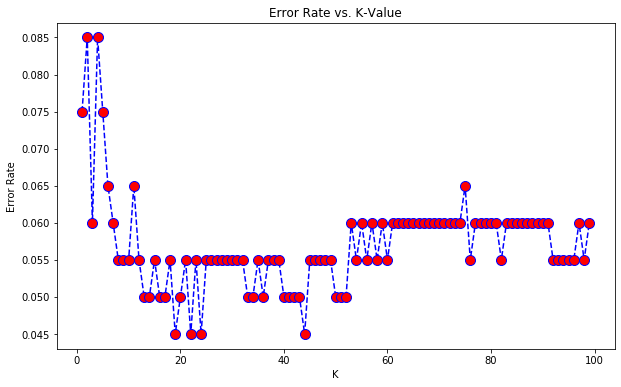

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,100):
    
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    pred_i = knn_k.predict(scaler.transform(X_test))
    accuracy.append(accuracy_score(y_test, pred_i))

In [28]:
accuracy

[0.925,
 0.915,
 0.94,
 0.915,
 0.925,
 0.935,
 0.94,
 0.945,
 0.945,
 0.945,
 0.935,
 0.945,
 0.95,
 0.95,
 0.945,
 0.95,
 0.95,
 0.945,
 0.955,
 0.95,
 0.945,
 0.955,
 0.945,
 0.955,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.95,
 0.95,
 0.945,
 0.95,
 0.945,
 0.945,
 0.945,
 0.95,
 0.95,
 0.95,
 0.95,
 0.955,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.95,
 0.95,
 0.95,
 0.94,
 0.945,
 0.94,
 0.945,
 0.94,
 0.945,
 0.94,
 0.945,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.935,
 0.945,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.945,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.94,
 0.945,
 0.94]

[]

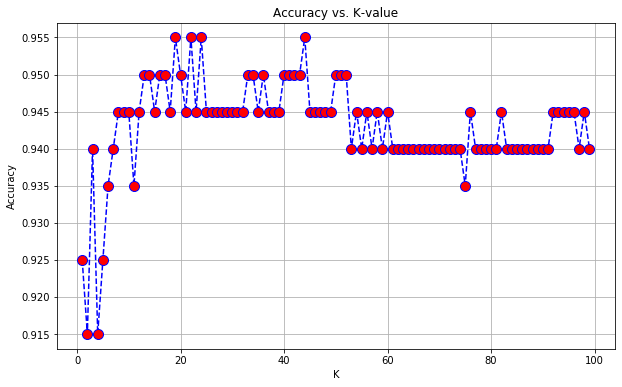

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K-value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.plot()

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(scaler.transform(X_test))

print('With K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With K = 1


[[100   6]
 [  9  85]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.93      0.90      0.92        94

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [32]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
pred = knn.predict(scaler.transform(X_test))

print('With K = 19')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With K = 19


[[101   5]
 [  4  90]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



from sklearn.neighbors import KNeighborsRegressor

Sentdex
https://www.youtube.com/watch?v=1i0zu9jHN6U